Saving Assignment Data Set - Mentor Data.csv to Assignment Data Set - Mentor Data.csv
Dataset shape: (120, 21)
  Session_ID Session_Date Session_Time  Program                       Batch  \
0     SS1001   2025-09-08        15:00  Academy     Academy Sept25 Advanced   
1     SS1002   2025-09-02        18:30  Academy      Academy Jul25 Beginner   
2     SS1003   2025-09-01        20:30     DSML         DSML Aug25 Advanced   
3     SS1004   2025-10-05        19:00  Academy  Academy Aug25 Intermediate   
4     SS1005   2025-09-19        12:30  Academy      Academy Jul25 Beginner   

  Learner_ID Learner_Name          Learner_Email Age_Cohort   Mentor_Name  \
0     L46048  Learner_126  learner_126@gmail.com   e_10-24M   Sneha Reddy   
1     L40495  Learner_259  learner_259@gmail.com     d_7-9M   Pooja Gupta   
2     L65392  Learner_175  learner_175@gmail.com       a_1M  Vikram Singh   
3     L20328  Learner_283  learner_283@gmail.com       a_1M  Vikram Singh   
4     L23238  Learner_195  le

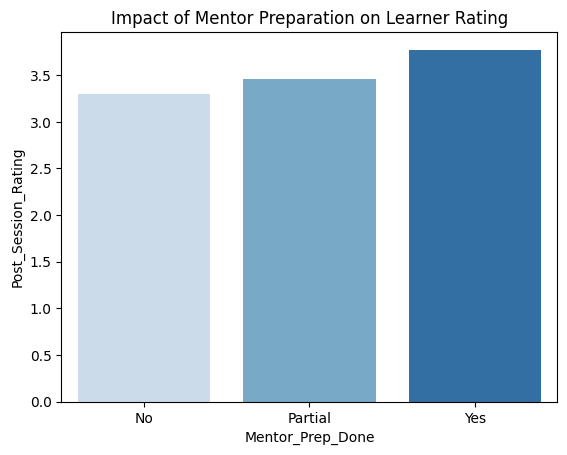


Learner Attendance Rate (%):
Learner_Attended
Yes    67.5
No     32.5
Name: proportion, dtype: float64


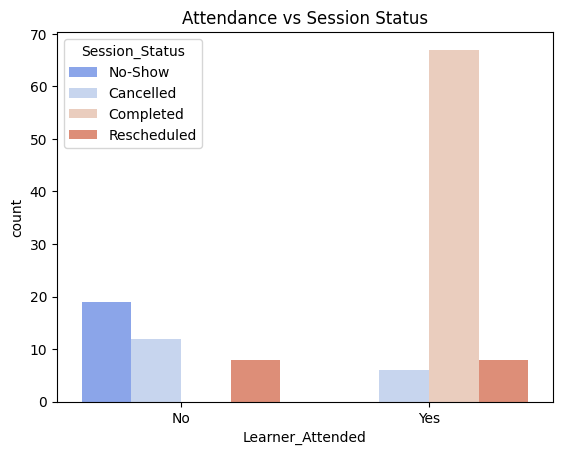


Problem Diagnosis Summary:
                     Issue  Value
0    High No-Show Rate (%)   0.00
1   Low Feedback Count (%)  58.33
2  Low Rated Sessions (<3)   6.00
3    Follow-up Missing (%)  58.33


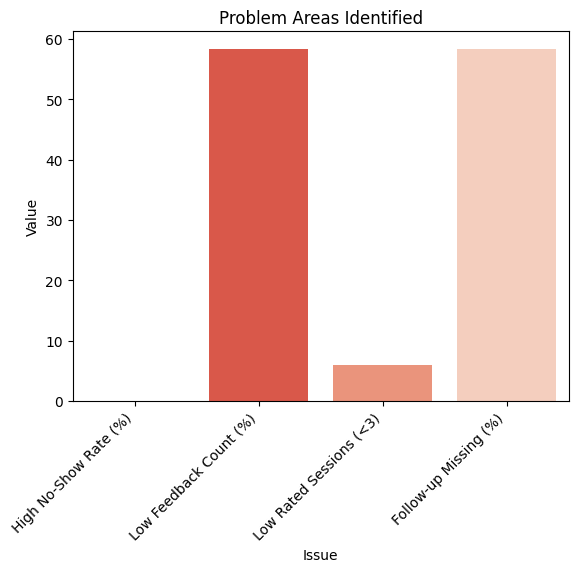


Correlation Matrix:
                         Scheduled_Duration_mins  Actual_Duration_mins  \
Scheduled_Duration_mins                 1.000000              0.382920   
Actual_Duration_mins                    0.382920              1.000000   
Post_Session_Rating                    -0.165484             -0.133888   

                         Post_Session_Rating  
Scheduled_Duration_mins            -0.165484  
Actual_Duration_mins               -0.133888  
Post_Session_Rating                 1.000000  


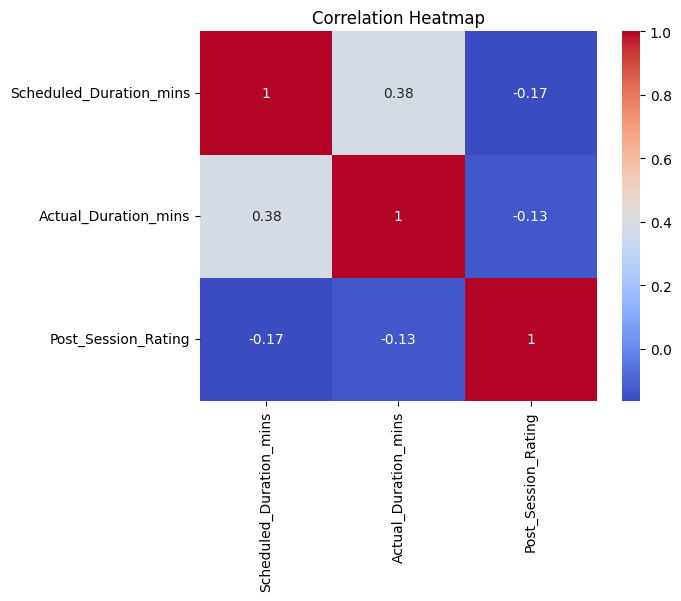

In [ ]:
# ------------------------------
# SECTION 1: PROBLEM DIAGNOSIS
# ------------------------------

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.files import files
warnings.filterwarnings("ignore", category=FutureWarning)

uploaded=files.upload()
df = pd.read_csv("Assignment Data Set - Mentor Data.csv")

# Basic overview
print("Dataset shape:", df.shape)
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nMissing Values:")
print(df.isnull().sum())

# Handle missing data
df['Learner_Feedback'] = df['Learner_Feedback'].fillna("No feedback provided")
df['Actual_Duration_mins'] = df['Actual_Duration_mins'].fillna(0)

# Standardize text formatting
df['Mentor_Prep_Done'] = df['Mentor_Prep_Done'].str.strip().str.title()
df['Session_Status'] = df['Session_Status'].str.strip().str.title()

# Descriptive statistics
print("\nBasic Session Statistics:")
print(df.describe(include='all').T)

# 1. Session Completion Rate
total_sessions = len(df)
completed_sessions = len(df[df['Session_Status'] == 'Completed'])
completion_rate = round((completed_sessions / total_sessions) * 100, 2)
print(f"\nSession Completion Rate: {completion_rate}%")

# 2. Average Post Session Rating
avg_rating = df['Post_Session_Rating'].mean()
print(f"Average Post Session Rating: {avg_rating:.2f}")

# 3. Mentor Preparation Impact
prep_ratings = df.groupby('Mentor_Prep_Done')['Post_Session_Rating'].mean().reset_index()
print("\nAverage Rating by Mentor Prep Done:")
print(prep_ratings)

sns.barplot(data=prep_ratings, x='Mentor_Prep_Done', y='Post_Session_Rating', palette='Blues')
plt.title("Impact of Mentor Preparation on Learner Rating")
plt.show()

# 4. Learner Attendance Analysis
attendance_rate = round(df['Learner_Attended'].value_counts(normalize=True) * 100, 2)
print("\nLearner Attendance Rate (%):")
print(attendance_rate)

sns.countplot(data=df, x='Learner_Attended', hue='Session_Status', palette='coolwarm')
plt.title("Attendance vs Session Status")
plt.show()

# 5. Key Problem Areas
problem_summary = {
    "High No-Show Rate (%)": round(len(df[df['Session_Status'] == 'No-show']) / total_sessions * 100, 2),
    "Low Feedback Count (%)": round(len(df[df['Learner_Feedback'] == 'No feedback provided']) / total_sessions * 100, 2),
    "Low Rated Sessions (<3)": len(df[df['Post_Session_Rating'] < 3]),
    "Follow-up Missing (%)": round(len(df[df['Follow_Up_Scheduled'] == 'No']) / total_sessions * 100, 2)
}

problem_df = pd.DataFrame(problem_summary.items(), columns=['Issue', 'Value'])
print("\nProblem Diagnosis Summary:")
print(problem_df)

sns.barplot(data=problem_df, x='Issue', y='Value', palette='Reds_r')
plt.title("Problem Areas Identified")
plt.xticks(rotation=45, ha='right')
plt.show()

# 6. Correlation Insights
corr = df[['Scheduled_Duration_mins', 'Actual_Duration_mins', 'Post_Session_Rating']].corr()
print("\nCorrelation Matrix:")
print(corr)

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 3.0 MB/s eta 0:00:00

Sentiment Distribution:
Feedback_Sentiment
Neutral     65.833333
Positive    28.333333
Negative     5.833333
Name: proportion, dtype: float64


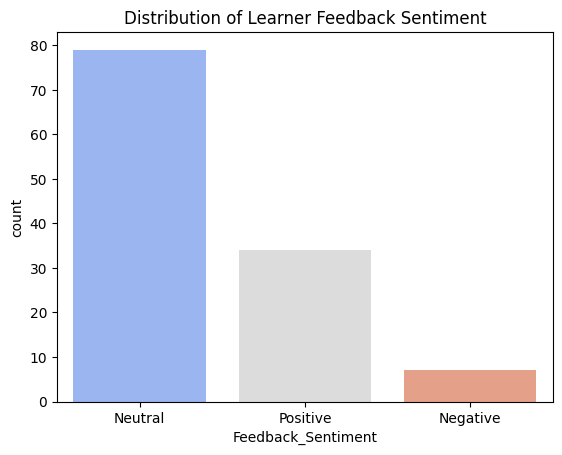

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]


Sample AI-Generated Session Summaries:

- Sneha Reddy conducted a Resume Review session. Limited learner feedback available.
- Pooja Gupta conducted a Career Guidance session. Limited learner feedback available.
- Session on 'Resume Review' by Vikram Singh highlighted career guidance, guidance motivating, excellent career.
- Vikram Singh conducted a Learning Roadmap session. Limited learner feedback available.
- Vikram Singh conducted a Project Discussion session. Limited learner feedback available.

AI Summary file saved as: mentor_session_ai_summary.csv

Average Rating by Sentiment:
  Feedback_Sentiment  Post_Session_Rating
0           Negative             3.142857
1            Neutral             3.846154
2           Positive             3.588235


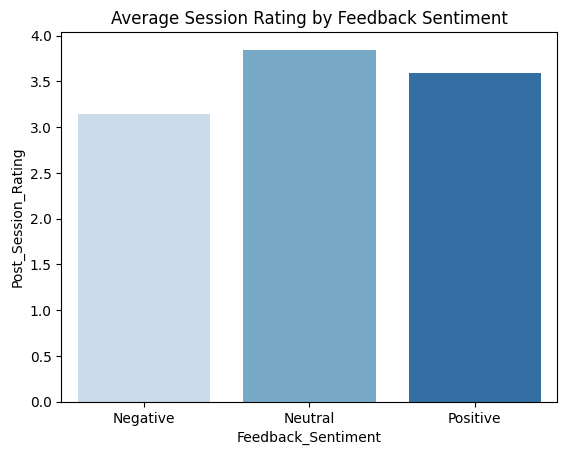

In [ ]:
# ----------------------------------------
# SECTION 2: AI / AUTOMATION INTEGRATION
# ----------------------------------------

#pip install keybert

warnings.filterwarnings("ignore", category=UserWarning)
from textblob import TextBlob
from keybert import KeyBERT

# Create a copy of data
ai_df = df.copy()

# ----------------------------------------
# Prototype 1: Feedback Sentiment Analyzer
# ----------------------------------------

def analyze_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return "Neutral"
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0.1:
        return "Positive"
    elif polarity < -0.1:
        return "Negative"
    else:
        return "Neutral"

ai_df['Feedback_Sentiment'] = ai_df['Learner_Feedback'].apply(analyze_sentiment)

print("\nSentiment Distribution:")
print(ai_df['Feedback_Sentiment'].value_counts(normalize=True) * 100)

sns.countplot(data=ai_df, x='Feedback_Sentiment', palette='coolwarm')
plt.title("Distribution of Learner Feedback Sentiment")
plt.show()

# ----------------------------------------
# Prototype 2: Smart Session Summary Generator
# ----------------------------------------

kw_model = KeyBERT()

def generate_summary(row):
    """
    Generates a short summary using session details and key feedback phrases.
    """
    text = str(row['Learner_Feedback'])
    if text == "No feedback provided" or len(text) < 10:
        return f"{row['Mentor_Name']} conducted a {row['Session_Type']} session. Limited learner feedback available."
    else:
        keywords = kw_model.extract_keywords(text, keyphrase_ngram_range=(1, 2), stop_words='english', top_n=3)
        key_terms = [kw[0] for kw in keywords]
        return f"Session on '{row['Session_Type']}' by {row['Mentor_Name']} highlighted {', '.join(key_terms)}."

ai_df['AI_Session_Summary'] = ai_df.apply(generate_summary, axis=1)

print("\nSample AI-Generated Session Summaries:\n")
for i in range(5):
    print(f"- {ai_df['AI_Session_Summary'].iloc[i]}")

# Save AI outputs
ai_df[['Session_ID', 'Feedback_Sentiment', 'AI_Session_Summary']].to_csv("mentor_session_ai_summary.csv", index=False)

print("\nAI Summary file saved as: mentor_session_ai_summary.csv")


sentiment_summary = ai_df.groupby('Feedback_Sentiment')['Post_Session_Rating'].mean().reset_index()
print("\nAverage Rating by Sentiment:")
print(sentiment_summary)

sns.barplot(data=sentiment_summary, x='Feedback_Sentiment', y='Post_Session_Rating', palette='Blues')
plt.title("Average Session Rating by Feedback Sentiment")
plt.show()



Program-Level KPIs:
                    Metric   Value
0           Total Sessions  120.00
1       Completed Sessions   67.00
2       Avg Session Rating    3.64
3       Mentor Prep Done %   56.67
4    Follow-up Scheduled %   41.67
5  Negative Feedback Count    7.00

Early Warning Flags:
  Session_ID   Mentor_Name  Post_Session_Rating  \
0     SS1001   Sneha Reddy                  NaN   
1     SS1002   Pooja Gupta                  NaN   
2     SS1003  Vikram Singh                  3.0   
3     SS1004  Vikram Singh                  NaN   
4     SS1005  Vikram Singh                  NaN   

                  Early_Warning_Flag  
0  Mentor Not Prepared, No Follow-up  
1  Mentor Not Prepared, No Follow-up  
2                           All Good  
3  Mentor Not Prepared, No Follow-up  
4                       No Follow-up  

Mentors with Most Warnings:
     Mentor_Name  Warning_Count
9    Priya Patel             10
11   Rohan Mehta              8
6     Kavya Nair              8
14  Vikram Sin

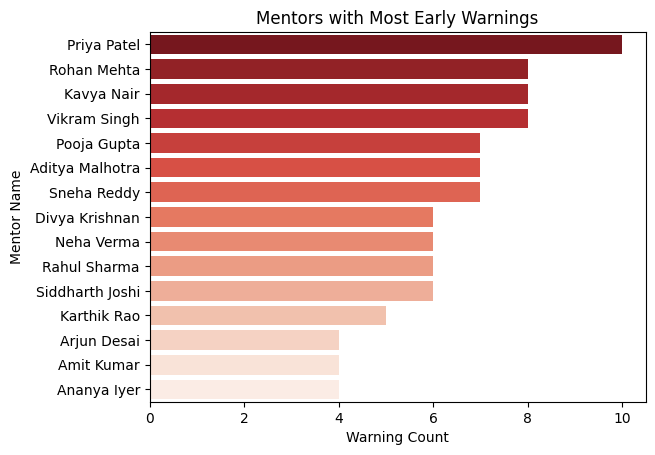


Tracker exported successfully → mentor_session_tracker.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

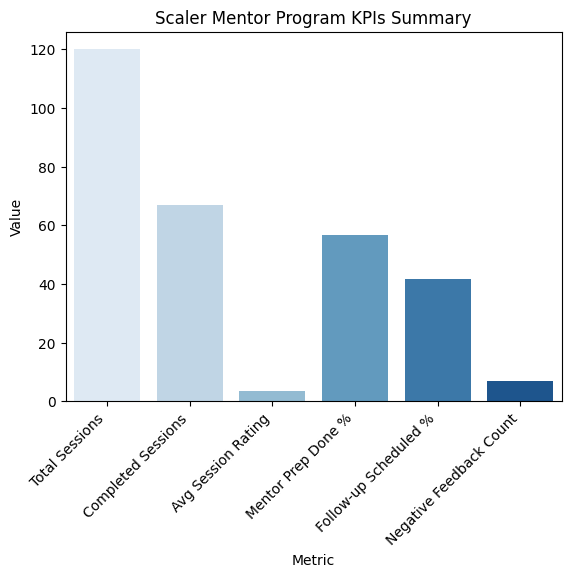

In [ ]:
# ----------------------------------------
# SECTION 3: SUCCESS METRICS & EARLY WARNING TRACKER
# ----------------------------------------

# -------------------------------
# 1. Compute Core Metrics
# -------------------------------
metrics = {
    "Total Sessions": len(ai_df),
    "Completed Sessions": len(ai_df[ai_df['Session_Status'] == 'Completed']),
    "Avg Session Rating": round(ai_df['Post_Session_Rating'].mean(), 2),
    "Mentor Prep Done %": round((ai_df['Mentor_Prep_Done'].eq('Yes').sum() / len(ai_df)) * 100, 2),
    "Follow-up Scheduled %": round((ai_df['Follow_Up_Scheduled'].eq('Yes').sum() / len(ai_df)) * 100, 2),
    "Negative Feedback Count": len(ai_df[ai_df['Feedback_Sentiment'] == 'Negative'])
}

metrics_df = pd.DataFrame(metrics.items(), columns=["Metric", "Value"])
print("\nProgram-Level KPIs:")
print(metrics_df)

# -------------------------------
# 2. Early Warning Rules
# -------------------------------
def early_warning(row):
    alerts = []
    if row['Post_Session_Rating'] < 3:
        alerts.append("Low Rating")
    if row['Mentor_Prep_Done'] != "Yes":
        alerts.append("Mentor Not Prepared")
    if row['Follow_Up_Scheduled'] == "No":
        alerts.append("No Follow-up")
    if row['Feedback_Sentiment'] == "Negative":
        alerts.append("Negative Feedback")
    if len(alerts) == 0:
        return "All Good"
    else:
        return ", ".join(alerts)

ai_df['Early_Warning_Flag'] = ai_df.apply(early_warning, axis=1)

print("\nEarly Warning Flags:")
print(ai_df[['Session_ID', 'Mentor_Name', 'Post_Session_Rating', 'Early_Warning_Flag']].head())

# -------------------------------
# 3. Aggregate Warnings by Mentor
# -------------------------------
mentor_alerts = (
    ai_df.groupby('Mentor_Name')['Early_Warning_Flag']
    .apply(lambda x: (x != "All Good").sum())
    .reset_index(name="Warning_Count")
    .sort_values(by="Warning_Count", ascending=False)
)

print("\nMentors with Most Warnings:")
print(mentor_alerts.head())

sns.barplot(data=mentor_alerts, x='Warning_Count', y='Mentor_Name', palette='Reds_r')
plt.title("Mentors with Most Early Warnings")
plt.xlabel("Warning Count")
plt.ylabel("Mentor Name")
plt.show()

# -------------------------------
# 4. Export for Dashboard Tracking
# -------------------------------
export_cols = [
    'Session_ID', 'Session_Date', 'Mentor_Name', 'Session_Type',
    'Post_Session_Rating', 'Feedback_Sentiment', 'Follow_Up_Scheduled',
    'Mentor_Prep_Done', 'Early_Warning_Flag'
]

ai_df[export_cols].to_excel("mentor_session_tracker.xlsx", index=False)

sns.barplot(data=metrics_df, x='Metric', y='Value', palette='Blues')
plt.title("Scaler Mentor Program KPIs Summary")
plt.xticks(rotation=45, ha='right')
plt.show()
